In [55]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft
import math

%matplotlib inline

# Преобразование Фурье

In [143]:

def Fourie(signal,garmonika):
    N_Period = int(64/garmonika)
    counter=0
    bufferX=[0.0]*N_Period
    bufferY=[0.0]*N_Period
    time=np.linspace(0,2,N_Period)
    SIN=np.sin(np.pi*time)
    COS=np.cos(np.pi*time)
    
    
    K_f=2/(math.sqrt(2)*N_Period)

    F_x=0
    F_y=0
    F = []
    
    for i in signal:
        F_x += i*SIN[counter] - bufferX[counter]
        bufferX[counter] = i*SIN[counter]
        F_y +=i*COS[counter] - bufferY[counter]
        bufferY[counter] = i*COS[counter]
        counter+=1
        if counter>=N_Period:
#             print(K_f*math.sqrt((F_x**2)+(F_y**2)))
            counter= 0
        F.append(K_f*math.sqrt((F_x**2)+(F_y**2)))
    return F

# Результат выполнения фильтрации Фурье с сигналом 
# I(t)= 2sin(wt+fi1)+0,5sin(2wt+fi2)

<Figure size 1200x400 with 0 Axes>

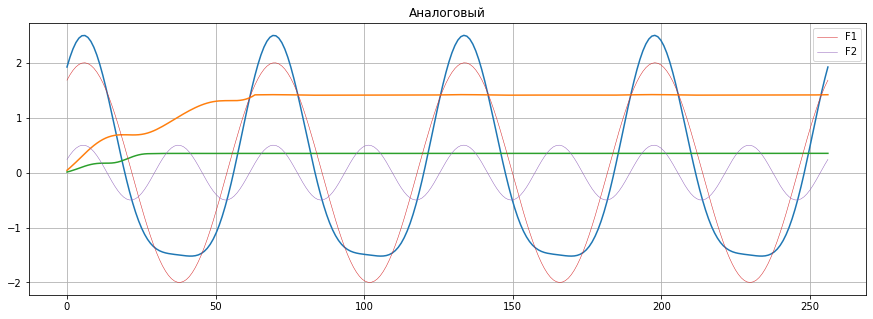

<Figure size 1200x400 with 0 Axes>

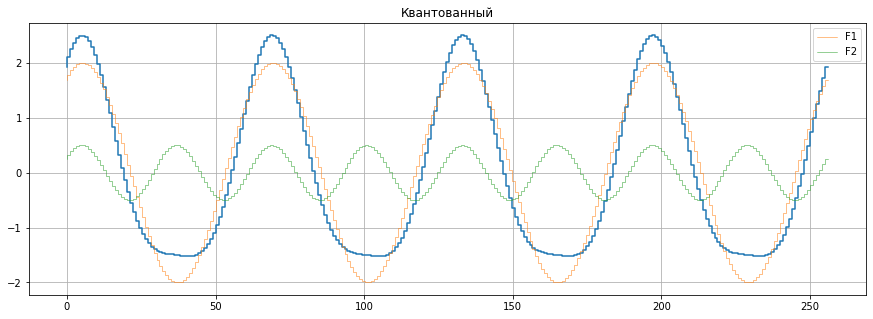

In [391]:
n = 256
# time vector
t = np.linspace(0, n, n, endpoint=True)
# sine wave
fi1 = 1
fi2 = 0.5
x1= 2*np.sin(2*np.pi/64*t+fi1) 
x2 = 0.5*np.sin(4*np.pi/64*t+fi2)
x=x1+x2

# Subplot titles
t_titles = ['Аналоговый', 'Дискретный', 'Квантованный']

# Plot figures
fig = plt.figure(figsize=(15, 5), dpi=80)
fig,ax = plt.subplots(figsize=(15,5))
ax.plot(t,x)
ax.plot(t,Fourie(x,1))
ax.plot(t,Fourie(x2,2))
ax.plot(t,x1,lw=0.5,label = "F1")
ax.plot(t,x2,lw=0.5,label = "F2")
plt.title(t_titles[0]) 
leg = ax.legend()
plt.grid(True)

fig = plt.figure(figsize=(15, 5), dpi=80)
fig,ax = plt.subplots(figsize=(15,5))
ax.step(t,x)
ax.step(t,x1,lw=0.5,label = "F1")
ax.step(t,x2,lw=0.5,label = "F2")
plt.title(t_titles[2]) 
leg = ax.legend()
plt.grid(True)


# Вейвлет преобразование Хаара

In [458]:
def VeivletHaara(signal):
    N = len(signal)//2
#     koef = 1/math.sqrt(2)
    koef = 0.5
    KoefHARRA_A =[]
    KoefHARRA_D =[]
    A = [0.0]*N
    D = [0.0]*N
    for i in range(0,len(signal)-1,2):
        A[i//2] = koef*(signal[i] + signal[i+1])  
        D[i//2] = koef*(signal[i] - signal[i+1])
    KoefHARRA_A.append(A)
    KoefHARRA_D.append(D)
    
    
    while N != 2:
#         print(len(KoefHARRA_A[-1]))
        lenght=N
        N = N//2
        A = [0.0]*N
        D = [0.0]*N
        for i in range(0,lenght-1,2):
            A[i//2] = koef*(KoefHARRA_A[-1][i] + KoefHARRA_A[-1][i+1])  
            D[i//2] = koef*(KoefHARRA_A[-1][i] - KoefHARRA_A[-1][i+1])
        KoefHARRA_A.append(A)
        KoefHARRA_D.append(D)
    N = N//2
    A = [0.0]*N
    D = [0.0]*N
    
    for i in range(0,N,2):
            A[i//2] = koef*(KoefHARRA_A[-1][i] + KoefHARRA_A[-1][i+1])  
            D[i//2] = koef*(KoefHARRA_A[-1][i] - KoefHARRA_A[-1][i+1])
    KoefHARRA_A.append(A)
    KoefHARRA_D.append(D)
    
#     print(KoefHARRA_A)
    
#     print(KoefHARRA_D)
    return KoefHARRA_A,KoefHARRA_D
    
def VeivletHaaraBack(A,D,N=64):
    SIGNAL = []
    
    new_KOEF=[]
    for i in range(len(D)):
        new_A =[]
        for j in range(len(D[len(D)-i-1])):
            new_A.append(A[len(D)-i-1][j]+D[len(D)-i-1][j])
            new_A.append(A[len(D)-i-1][j]-D[len(D)-i-1][j])
        new_KOEF.append(new_A)
#         print(len(new_A))
        
        SIGNAL = new_KOEF[-1]
            
    return SIGNAL       
    
def GrafikKoef(A,D):
    fig,axs = plt.subplots(5, 2,figsize=(10,10))
    counter=0
    n=64
    for i in range(len(A)-1):
        n=n//2
        t = np.linspace(0, n, n, endpoint=True)
        axs[counter,0].plot(t,A[counter])
        axs[counter,1].plot(t,D[counter])
        
        counter+=1
#     for i in range(len(D)):
#         new_A =[]
#         for j in range(len(D[len(D)-i-1])):
#             new_A.append(A[len(D)-i-1][j]+D[len(D)-i-1][j])
#             new_A.append(A[len(D)-i-1][j]-D[len(D)-i-1][j])
#         new_KOEF.append(new_A)

# Графики коэфициентов разложения сигнала
# # I(t)= 2sin(wt+fi1)+0,5sin(100wt+fi2)

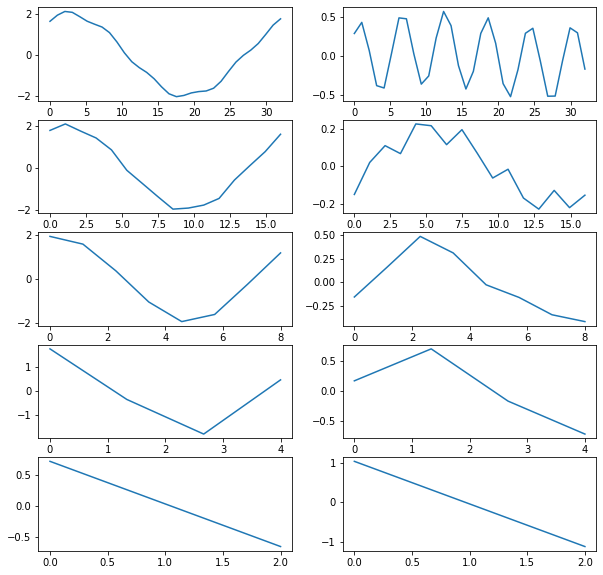

In [460]:
coefsA,coefsD = VeivletHaara(x)
GrafikKoef(coefsA,coefsD)

# Исходный график с восстановленным сигналом с зануленными первыми 32 детализирующими коэфициентами

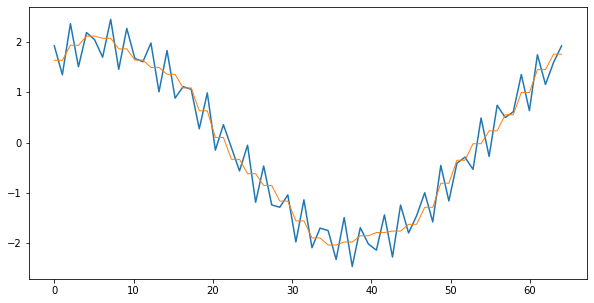

In [461]:
n = 64
# time vector
t = np.linspace(0, n, n, endpoint=True)
# sine wave
fi1 = 1
fi2 = 0.5
x1= 2*np.sin(2*np.pi/64*t+fi1) 
x2 = 0.5*np.sin(100*2*np.pi/64*t+fi2)
x=x1+x2
fig = plt.figure(figsize=[10,5])
# plt.plot(t,x)


coefsA,coefsD = VeivletHaara(x)

# for i in coefsA:
#     signal=[]
#     count+=1
#     if count<2:
#         t=np.linspace(0,64,64)
#         n=64//len(i)
#         for j in range(0,64,n):
#             signal.append(i[j//n])
#             signal.append(i[j//n])
#         print(len(signal))
#         plt.step(t,signal)


s = VeivletHaaraBack(coefsA,coefsD)

plt.plot(t,s)

coefsD[0] = [0.0]*32
# coefsD[1] = [0.0]*16
# coefsD[2] = [0.0]*8
# coefsD[3] = [0.0]*4
# coefsD[4] = [0.0]*2
# coefsD[5] = [0.0]*1

s = VeivletHaaraBack(coefsA,coefsD)

plt.plot(t,s,lw=1)

count = 0
